In [1]:
from pybrain.tools.shortcuts import buildNetwork 
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dia = csv.excel()
df = pd.read_csv("xor.csv")

In [3]:
 X,Y = df[['X1','X2']],df[['Y']]

In [9]:
import numpy as np
np.asarray(Y).shape[1]

1L

In [101]:
net = buildNetwork(2, 2, 1)

ds= SupervisedDataSet(2, 1)
ds.setField('input', X)
ds.setField('target', Y) 

In [102]:
x=0
trainer = BackpropTrainer(net, ds) 
x=trainer.trainUntilConvergence()

In [103]:
net.activate([1,1])

array([-0.28141151])

In [104]:
df1 = pd.read_csv("xor.csv")
df1

,X1,X2,Y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [105]:
p=net.params
m=-p[6]/p[7]

b=-p[0]/p[7]

m1=-p[6]/p[7]
b1=-p[0]/p[6]+1

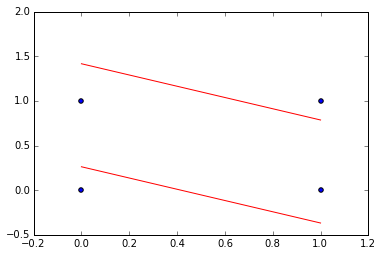

In [106]:
plt.scatter(df1[['X1']],df1[['X2']])
plt.plot(df[['X1']],m*(df[['X1']])+b,color='red')
plt.plot(df[['X1']],m1*(df[['X1']])+b1,color='red')

In [107]:
for c in [connection for connections in net.connections.values() for connection in connections]:
    print("{} -> {} => {}".format(c.inmod.name, c.outmod.name, c.params))

hidden0 -> out => [ 1.87177718 -1.05143279]
in -> hidden0 => [-0.15982175  0.07295085  0.77017438  1.1794661 ]
bias -> out => [-0.49064143]
bias -> hidden0 => [ 0.67539804  0.90838305]


In [108]:
p

array([-0.49064143,  0.67539804,  0.90838305, -0.15982175,  0.07295085,
        0.77017438,  1.1794661 ,  1.87177718, -1.05143279])